### 데이터불러오기

In [2]:
import pandas as pd
file_path = './python-data-analysis-master/python-data-analysis-master/data/chipotle.tsv'
chipo= pd.read_csv(file_path, sep='\t')
print(chipo.shape)
print("--------------------------------------")
print(chipo.info())

(4622, 5)
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [5]:
chipo['order_id']=chipo['order_id'].astype(str)
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [9]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


In [13]:
item_count= chipo['item_name'].value_counts()[:10]  #치포의 item_name컬럼의 값들을 카운트. 탑 0부터 9의 10개.
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print("Top",idx,":",val,cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [20]:
order_count= chipo.groupby('item_name')['order_id'].count()  #item_name별로 그룹핑해서 order_id를 카운팅(주문횟수)
order_count[:10]



item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [21]:
item_quantity=chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [22]:
order_count= chipo.groupby('item_name')['quantity'].count()  #item_name별로 그룹핑해서 주문총량 카운팅
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: quantity, dtype: int64

### item name을 위치로만 표시하여 item_name별 주문량 분포를 시각화

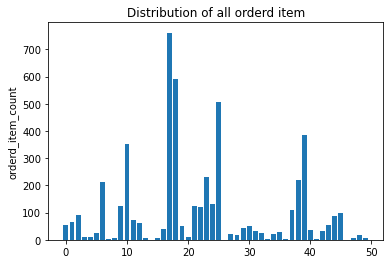

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list=item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))
order_cnt= item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('orderd_item_count')
plt.title('Distribution of all orderd item')
plt.show()

In [27]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


In [29]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [30]:
chipo['item_price']= chipo['item_price'].apply(lambda x:float(x[1:]))  #x로 받아온 값들을 1번 위치부터 실수형으로 바꾸어 apply.
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [36]:
chipo.groupby('order_id')['item_price'].sum().mean()  #order_id 별로 (한 사람 별로) item_price의 sum을 구한다. 즉 1인당의 구매금액/
                                                        #그것의 mean 평균.

18.811428571428717

In [37]:
chipo_orderid_group = chipo.groupby('order_id').sum()  #order_id별로 묶은 것의 sum. 
print(chipo_orderid_group)      # 계산 가능한 숫자열 들의 sum을 계산한 결과가 나옴.

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]


In [38]:
results= chipo_orderid_group[chipo_orderid_group.item_price >= 10] 
print(results)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]


In [40]:
print(results.index.values)

['1' '10' '100' ... '997' '998' '999']


In [41]:
print(results.index)           #result객체의 index값을 프린트하면, 가장 앞에있는 orde_id컬럼의 값들이 index로 묶여서 나온다.
                                 #index.values로 프린트하면 인덱스의 벨류값들만 리스트로 나온다.

Index(['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005',
       '1006',
       ...
       '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
      dtype='object', name='order_id', length=1834)


In [49]:
# 각 아이템의 가격 구하기
chipo_one_item= chipo[chipo.quantity==1]  #quantity가 1일때의 로우만 뽑아낸다.
price_per_item= chipo_one_item.groupby('item_name').min() #앞에서 선별해낸 것들 중 아이템 이름이 같은 것들 중에서
                                                        #최소값을 뽑아낸다.
price_per_item.sort_values(by = 'item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [51]:
#최소값을 뽑아낸 것을 정렬하는데, 아이템가격을 기준으로 내림차순으로 정렬한 것.
#item_name으로 그룹핑 해서 그게 인덱스로 맨 앞에 들어가 있다.
# print(price_per_item.index) 해보면 확인가능

In [52]:
item_name_list = price_per_item.index.tolist()
print(price_per_item.head())

                      order_id  quantity  \
item_name                                  
6 Pack Soft Drink         1076         1   
Barbacoa Bowl             1000         1   
Barbacoa Burrito          1002         1   
Barbacoa Crispy Tacos      110         1   
Barbacoa Salad Bowl       1283         1   

                                                      choice_description  \
item_name                                                                  
6 Pack Soft Drink                                                 [Coke]   
Barbacoa Bowl          [Fresh Tomato (Mild), [Lettuce, Black Beans, R...   
Barbacoa Burrito       [Fresh Tomato (Mild), [Black Beans, Rice, Sour...   
Barbacoa Crispy Tacos                    [Fresh Tomato Salsa, Guacamole]   
Barbacoa Salad Bowl                      [Fresh Tomato Salsa, Guacamole]   

                       item_price  
item_name                          
6 Pack Soft Drink            6.49  
Barbacoa Bowl                8.69  
Barbacoa Burri

In [54]:
print(price_per_item.index)                #인덱스는 맨 앞의 컬럼인 item_name의 값이 나온다.

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

In [55]:
print(price_per_item.index.tolist())             #index의 값을 리스트화 한다.

['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie Burrito', 'Veg

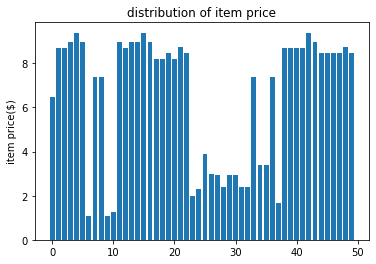

In [63]:
item_name_list = price_per_item.index.tolist()   #item name을 리스트화.
x_pos= np.arange(len(item_name_list)) #x의 위치는 item_name의 값의 개수만큼 = len길이만큼 잡는다.
item_price= price_per_item['item_price'].tolist() #item_price컬럼의 값들을 리스트화함.

plt.bar(x_pos, item_price, align='center') #x의 위치는 item_name의 정렬. y축은 item_price. 정렬은 가운데정렬.
plt.ylabel('item price($)')
plt.title('distribution of item price')       #한글로 넣었더니 안 됐다.. 왜지?
plt.show()


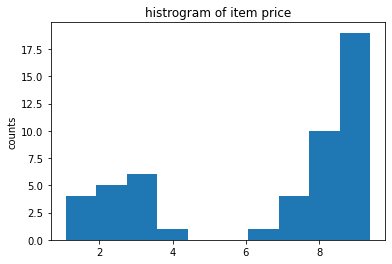

In [61]:
#이번엔 히스토그램. 히스토그램은 도수분표를 시각화한 것이라는데... 데분 들어가니 통계적 개념들이 조금씩 나오기 시작한다.
plt.hist(item_price) # 1차원 리스트만 인자로 넣어도 결과가 나온다.
plt.ylabel('counts') 
plt.title('histrogram of item price')
plt.show()

In [65]:
# 가장 비싼 주문
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]
#order_id별의 sum을 구한다. 그럼 수량과 가격 (숫자열) 값들의 sum이 구해짐.
#그걸 item_price 컬럼의 벨류를 기준으로 정렬하는데, 내림차순으로 정렬함. 그중 5개까지를 뽑는다.

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [67]:
#특정 아이템의 주문횟수
chipo_salad=chipo[chipo['item_name']=="Veggie Salad Bowl"]
chipo_salad=chipo_salad.drop_duplicates(['item_name','order_id'])
chipo_salad

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [69]:
#치킨볼 두번이상 주문한 횟수는?
chipo_chicken =chipo[chipo['item_name']=="Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >=2 ]   #치킨볼 주문한 것 중 퀀티티가 2 이상인 주문
print(chipo_chicken_result.shape[0])

33
